# TED Talk -Simple EDA

이번 노트북에서는 2017년 10월 21일까지 TED Talk 사이트에 업로드 된 TED Talk 데이터를 통해 
간단한 탐사분석을 할 것이다.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('ted_main.csv')
df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [7]:
# 데이터 columns 재정렬
df = df[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 'film_date', 'published_date', 'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']]

In [8]:
df.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,1140825600,1151367060,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,1140825600,1151367060,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,1140739200,1151367060,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,1140912000,1151367060,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,1140566400,1151440680,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869


위 데이터프레임을 보면 film_data(촬영날), published_data(Ted사이트에 업로드된 날)이 Unix timestamp로 되어 있다 

이것을 알아 보기 쉬운 날짜 형태로 바꾸어보자

In [9]:
import datetime
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [13]:
df[['film_date','published_date']].head()

,film_date,published_date
0,25-02-2006,27-06-2006
1,25-02-2006,27-06-2006
2,24-02-2006,27-06-2006
3,26-02-2006,27-06-2006
4,22-02-2006,28-06-2006


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
name                  2550 non-null object
title                 2550 non-null object
description           2550 non-null object
main_speaker          2550 non-null object
speaker_occupation    2544 non-null object
num_speaker           2550 non-null int64
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null object
published_date        2550 non-null object
comments              2550 non-null int64
tags                  2550 non-null object
languages             2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(5), object(12)
memory usage: 338.8+ KB


총 2550개의 데이터와 17개의 Column을 가지고 있다.

In [15]:
df.describe()

,num_speaker,duration,comments,languages,views
count,2550.000000,2550.000000,2550.000000,2550.000000,2.550000e+03
mean,1.028235,826.510196,191.562353,27.326275,1.698297e+06
std,0.207705,374.009138,282.315223,9.563452,2.498479e+06
min,1.000000,135.000000,2.000000,0.000000,5.044300e+04
25%,1.000000,577.000000,63.000000,23.000000,7.557928e+05
50%,1.000000,848.000000,118.000000,28.000000,1.124524e+06
75%,1.000000,1046.750000,221.750000,33.000000,1.700760e+06
max,5.000000,5256.000000,6404.000000,72.000000,4.722711e+07


가장 짧은 강연이 2분15초인 것과 제공된 언어가 0인것이 인상깊은 데이터다

## 가장 많은 view를 가진 강연은?

In [17]:
pop_talks = df[['title', 'main_speaker', 'views', 'film_date']].sort_values('views', ascending=False)[:15]
pop_talks

,title,main_speaker,views,film_date
0,Do schools kill creativity?,Ken Robinson,47227110,25-02-2006
1346,Your body language may shape who you are,Amy Cuddy,43155405,26-06-2012
677,How great leaders inspire action,Simon Sinek,34309432,17-09-2009
837,The power of vulnerability,Brené Brown,31168150,06-06-2010
452,10 things you didn't know about orgasm,Mary Roach,22270883,06-02-2009
1776,How to speak so that people want to listen,Julian Treasure,21594632,10-06-2013
201,My stroke of insight,Jill Bolte Taylor,21190883,27-02-2008
5,Why we do what we do,Tony Robbins,20685401,02-02-2006
2114,This is what happens when you reply to spam email,James Veitch,20475972,08-12-2015
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,27-10-2012


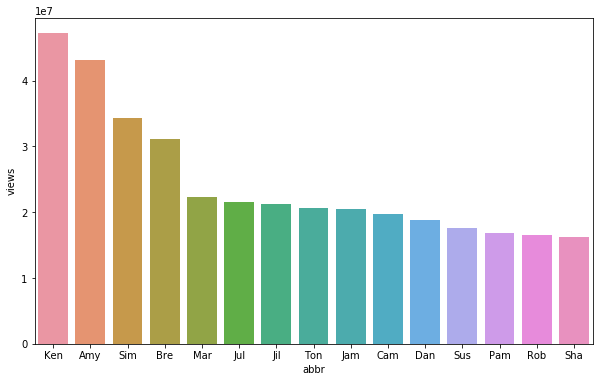

In [18]:
pop_talks['abbr'] = pop_talks['main_speaker'].apply(lambda x: x[:3])
plt.figure(figsize=(10,6))
sns.barplot(x='abbr', y='views', data=pop_talks)

Ken Robinson의 Do schools Kill Creativity? 가 가장 많은 사람들이 시청한 강연이다.

또한, 처음 업로든 된 동영상 중 하나이다. 

___________________ _

마지막으로 View의 분포에 대해 알아보자

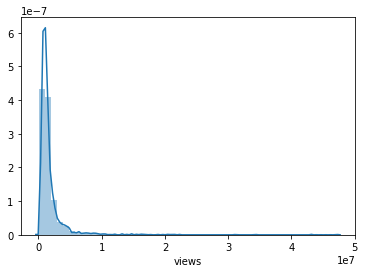

In [23]:
sns.distplot(df['views'])

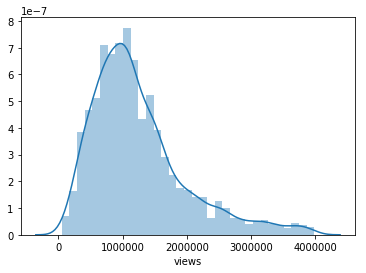

In [24]:
#아웃라이어를 제외하고 분포를 다시보자 
sns.distplot(df[df['views'] < 0.4e7]['views'])

In [27]:
df['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

평균 시청수는 1.5만뷰이고 대부분 4만뷰보다 낮다 

## Comments 에 대한 분석

In [28]:
df['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

평균적으로 191개의 comment가 달린다는 것을 알 수 있다. 

또한, 편차가 평균보다 많은 차이로 크기 때문에 outlier의 존재가 의심 된다.

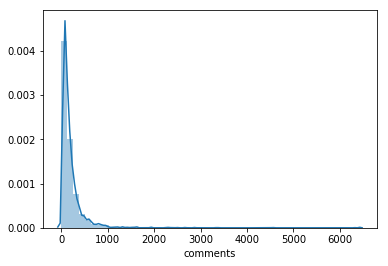

In [29]:
sns.distplot(df['comments'])

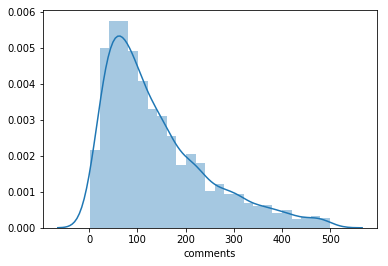

In [31]:
sns.distplot(df[df['comments']<500]['comments'])

대부분의 comment는 500보다 작다. 즉 평균은 outlier의 영향을 받았다는 것이다.

_ _

여기서 또 하나 궁금한 것은 comment가 많은 talk일 수록 view가 많은가 이다.

상식적으로 생각 했을때 많은 사람이 보았기 때문에 comment가 많을 거라고 예상할 수 있다. 

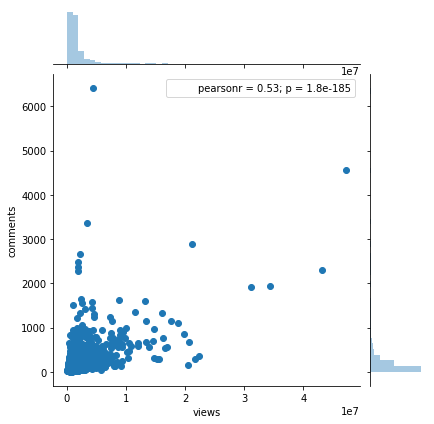

In [32]:
sns.jointplot(x='views', y='comments', data=df)

In [33]:
df[['views','comments']].corr()

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


위의 scatter plot과 피어슨 상관계수를 통해서 view와 comment사이의 유의미한 양의 상관관게가 있다는 것을 알았다.

In [34]:
#가장 많은 comment를 받은 Top10 
df[['title', 'main_speaker','views', 'comments']].sort_values('comments', ascending=False).head(10)

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


위의 데이터 프레임을 보면 1등인 Militant atheism 상대적은로 적은 뷰를 기록했지만 가장 많은 comment를 받았다.

그렇다면 어떤 talk가 사람들을 comment달게 하는 것인가?

In [35]:
# 뷰대비 comment를 나타낼수 있는 feature 생성 
df['dis_quo'] = df['comments']/df['views']

In [36]:
df[['title', 'main_speaker','views', 'comments', 'dis_quo', 'film_date']].sort_values('dis_quo', ascending=False).head(10)

,title,main_speaker,views,comments,dis_quo,film_date
744,The case for same-sex marriage,Diane J. Savino,292395,649,0.002220,02-12-2009
803,E-voting without fraud,David Bismark,543551,834,0.001534,14-07-2010
96,Militant atheism,Richard Dawkins,4374792,6404,0.001464,02-02-2002
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,1057238,1502,0.001421,10-02-2010
954,Taking imagination seriously,Janet Echelman,1832930,2492,0.001360,03-03-2011
840,On reading the Koran,Lesley Hazleton,1847256,2374,0.001285,10-10-2010
876,Curating humanity's heritage,Elizabeth Lindsey,439180,555,0.001264,08-12-2010
1787,How do you explain consciousness?,David Chalmers,2162764,2673,0.001236,18-03-2014
661,The danger of science denial,Michael Specter,1838628,2272,0.001236,11-02-2010
561,Dance to change the world,Mallika Sarabhai,481834,595,0.001235,04-11-2009


위 데이터프레임을 보면 재미있는 사실을 알 수 있다. 상위 10개중 5개가 종교와 신념에 관련된 talk이다. 

입장이 확연하게 드러나는 talk일 수록 사람들 사이의 논쟁이 많다는 것을 알 수 있다.
